<a href="https://colab.research.google.com/github/AnIsAsPe/Aprendizaje-por-Refuerzo/blob/main/Notebooks/Estrategia_Exploraci%C3%B3nExplotaci%C3%B3n_Multi_Armed_Bandit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bibliotecas y Funciones


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def entorno_multi_armed_bandit(maquinas):
    '''
    Creamos el entorno para el problema "multi_armed_bandit" generando aleatoriamente
    la distribución de probabilidad de los premios que otorga cada máquina
    '''
    medias = np.random.uniform(-10, 5, size=maquinas)
    std_ = np.random.uniform(0, 5, size=maquinas)
    return medias, std_

In [3]:
def init_Q(maquinas):
  '''Inicializa el vector Q en ceros, el vector Q representa el valor esperado
   de recompensa de cada máquina'''
  Q =np.zeros(shape =(1, maquinas))
  return Q

In [4]:
def selecciona_maquina(maquinas):
    '''selecciona una máquina aleatoriamente con distribución unifome'''
    selec = np.random.choice(range(maquinas))
    return selec

In [5]:
def selecciona_maquina_expl(maquinas):
    '''selecciona la maquina con el maximo valor de la ganancia esperada'''
    select = np.argmax(Q[0])
    return selec

In [6]:
def selecciona_maquina_egd(maquinas, epsilon):
    '''selecciona una con la estrategia epsilon decreasing greedy'''
    p = np.random.uniform(0,1)

    # cuándo epsilon es pequeño, se escoge la maquina con mayor ganancia
    if p < (1 - epsilon):
        selec = np.argmax(Q[0])
        return selec  

    # cuando epsilon es pequeño, se escoge una al azar
    else: 
        selec = np.random.choice(range(maquinas))
        return selec

In [7]:
def calcula_recompensa(selec):
  '''calcula la recompensa de jugar en una determinada máquina'''
  r = int(np.random.normal(medias[selec], std_[selec], 1))
  return r

In [8]:
def actualiza_Q (Q, selec, r, episodio):
    '''actualiza el valor esperados de recompensa de la máquina seleccionada'''
    Q[0, selec] = Q[0, selec] + 1/(episodio)*(r - Q[0, selec])
    return Q

# Introducción

## Definimos nuestro entorno

In [9]:
### Creamos el entorno definiendo el comportamiento de cada máquina

premio_medio  = np.array([5,  1,  0, -10])
desv_estandar = np.array([1, 0.1, 5,  1])

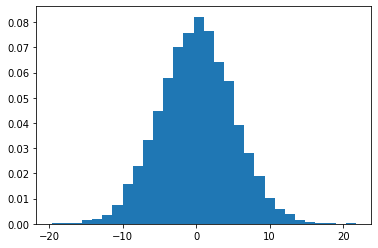

In [10]:
maquina = 2
s = np.random.normal(premio_medio[maquina], desv_estandar[maquina],10000)
plt.hist( s, bins=30,  density=True)
plt.show()

## ¿Que hace un jugador en el casino?

* inicializamos en cero la variable que guardará los premios o perdidas acumuladas 

In [11]:
ganado = 0

* seleccionamos una de las maquinas, se juega en ella y se obtiene la recompensa

In [12]:
selec = 3
r = int(np.random.normal(premio_medio[selec], desv_estandar[selec], 1))
ganado += r
print('recompensa(r):', r)
print('ganado:', ganado)

recompensa(r): -10
ganado: -10


##  ¿Cómo guardamos la información de los premios obtenidos de cada máquina?

In [13]:
# Inicializa el vector Q en ceros, donde guardaremos la información
n_maquinas = 4 
Q = np.zeros(shape =(1, n_maquinas))
Q

array([[0., 0., 0., 0.]])

In [14]:
ep = 1   # identifica el número de juegos (episodios)
selec = 1         # seleccionamos una máquina
r = int(np.random.normal(premio_medio[selec], desv_estandar[selec], 1))  # jugamos y obtenemos la recompensa
print('premio =', r)
Q[0, selec] = Q[0, selec] + 1/(ep)*(r - Q[0, selec]) # actualiza la información en la máquina jugada
Q

premio = 1


array([[0., 1., 0., 0.]])

* ¿cómo seleccionamos nuestra siguiente máquina?
* ¿y depues de dos, 10, 20 juegos?

In [15]:
# Vamos a jugar cierto número de veces (episodios)
episodios = 5
n_maquinas = 4
Q =np.zeros(shape =(1, n_maquinas))
ganado = 0

for ep in range(1, episodios+1):
  selec = np.random.choice([0,1,2,3]) # selección aleatoria -> explotación
  r = int(np.random.normal(premio_medio[selec], desv_estandar[selec], 1))
  Q[0, selec] = Q[0, selec] + 1/(ep)*(r - Q[0, selec])
  ganado += r
  print('Episodio_{}, Máquina {}, Premio = {}, Premio_acum = {}, Q:{} \n'.format(ep,
                                                                   selec,
                                                                   r, 
                                                                   ganado,
                                                                   Q.round(2)))


Episodio_1, Máquina 1, Premio = 1, Premio_acum = 1, Q:[[0. 1. 0. 0.]] 

Episodio_2, Máquina 2, Premio = -6, Premio_acum = -5, Q:[[ 0.  1. -3.  0.]] 

Episodio_3, Máquina 3, Premio = -8, Premio_acum = -13, Q:[[ 0.    1.   -3.   -2.67]] 

Episodio_4, Máquina 0, Premio = 4, Premio_acum = -9, Q:[[ 1.    1.   -3.   -2.67]] 

Episodio_5, Máquina 0, Premio = 4, Premio_acum = -5, Q:[[ 1.6   1.   -3.   -2.67]] 



¿Sería correcto si, en lugar de escojer la máquina de forma aleatoria, escojemos la que más rendimientos ha dado?

In [16]:
selec = np.argmax(Q[0])  # selección usando la estrategia de explotación
selec

0

¿Podemos pensar en una estrategia combinada?

In [17]:
p = np.random.uniform(0, 1 )  # escojemos un valor entre 0 y 1
ε = .99 # valor que disminuye desde 1 hasta 0 según avance el aprendizaje
print('p = {}, ε = {}'.format(p,ε))
print('¿p es menor que 1 - ε?', p < (1 - ε))
if p < (1 - ε):
    # Explotación
    print('explotación')
    selec = np.argmax(Q[0])
else: 
    # Exploración
    print('exploración')
    selec = np.random.choice(range(n_maquinas))
selec

p = 0.8458317945017328, ε = 0.99
¿p es menor que 1 - ε? False
exploración


0

Vamos a calcular  ε en función de los episodios, de manera decreciente


In [18]:
episodios = 100
ε = np.exp(-5 * np.linspace(0, 1, episodios))
ε

array([1.        , 0.95074913, 0.9039239 , 0.85940486, 0.81707842,
       0.7768366 , 0.73857671, 0.70220117, 0.66761715, 0.63473642,
       0.6034751 , 0.57375342, 0.54549556, 0.51862943, 0.49308648,
       0.46880154, 0.44571265, 0.42376092, 0.40289032, 0.38304762,
       0.36418219, 0.3462459 , 0.32919299, 0.31297995, 0.29756541,
       0.28291005, 0.26897649, 0.25572916, 0.24313428, 0.2311597 ,
       0.21977488, 0.20895078, 0.19865977, 0.1888756 , 0.17957331,
       0.17072917, 0.16232061, 0.15432618, 0.14672548, 0.13949912,
       0.13262867, 0.12609659, 0.11988622, 0.11398172, 0.10836802,
       0.1030308 , 0.09795645, 0.09313201, 0.08854517, 0.08418425,
       0.0800381 , 0.07609615, 0.07234835, 0.06878513, 0.0653974 ,
       0.06217652, 0.05911428, 0.05620285, 0.05343481, 0.0508031 ,
       0.048301  , 0.04592213, 0.04366043, 0.04151011, 0.0394657 ,
       0.03752198, 0.03567399, 0.03391702, 0.03224658, 0.0306584 ,
       0.02914845, 0.02771286, 0.02634798, 0.02505032, 0.02381

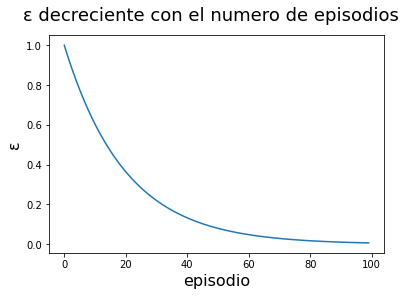

In [19]:
fig =plt.figure()
plt.plot(ε)
plt.xlabel('episodio', fontsize=16)
plt.ylabel('ε', fontsize=16)
fig.suptitle('ε decreciente con el numero de episodios', fontsize=18)

plt.show()

# Aprendizaje con distintas estrategias

In [20]:
### Definimos el número de máquinas o brazos del problema
n_maquinas = 3

### Creamos el entorno
np.random.seed(28)
medias, std_ = entorno_multi_armed_bandit(n_maquinas)  # inicializa la distribución de probabilidad de cada máquina

In [21]:
### Definimos el número de episodios (juegos)
episodios = 200

## Exploración

In [22]:
### Inicializamos el vector Q  
Q = init_Q(n_maquinas)  
ganado = 0
for episodio in range(1,episodios+1):
    selec = selecciona_maquina(n_maquinas)
    # Calcula el premio de esa acción
    r = calcula_recompensa(selec)
    # Actualiza la información de lo ganado por cada máquina
    Q = actualiza_Q(Q, selec, r, episodio)
  
    ganado += r
  
print("La ganancia total es de: ", ganado)

La ganancia total es de:  -450


## Explotación

In [23]:
### Inicializamos el vector Q  
Q = init_Q(n_maquinas)  

premios = 0
for i in range(n_maquinas):  # creamos un ciclo para jugar en cada máquina
    r = calcula_recompensa(i)
    Q = actualiza_Q(Q, i, r, i+1)
    premios += r
for episodio in range(n_maquinas+1 ,episodios+1): # el resto de los episodios los jugamos con una estrategia codiciosa
    selec = selecciona_maquina_expl(n_maquinas)
    r = calcula_recompensa(selec)
    Q = actualiza_Q(Q, selec, r, ganado)
    premios += r
print("La ganancia total es de: ", premios)

La ganancia total es de:  -1526


## Epsilon decreasing greedy

In [24]:
### Inicializamos el vector Q  
Q = init_Q(n_maquinas)  

epsilon = np.exp(-5 * np.linspace(0, 1, episodios))

premios = 0
for episodio in range(1 ,episodios+1):
  eps = epsilon[episodio-1]  #epsilon decreciente
  selec = selecciona_maquina_egd(n_maquinas, eps)
  r = calcula_recompensa(selec)
  Q = actualiza_Q(Q, selec, r, episodio)
  premios += r

print("La ganancia total es de: ", premios)

La ganancia total es de:  -24


# Referencias:

[1]A. Aristizabal, «Understanding Reinforcement Learning Hands-On: Multi-Armed Bandits», Medium, oct. 19, 2020. https://towardsdatascience.com/understanding-reinforcement-learning-hands-on-part-2-multi-armed-bandits-526592072bdc (accedido jul. 30, 2021).

